Манга — это популярная форма японской культуры, представляющая собой графические романы и комиксы. Эти иллюстрированные книги включают разнообразные сюжеты и подходят для читателей всех возрастов. Отличительной чертой манги являются её выразительный визуальный стиль, проработанные персонажи и широкий выбор тематик. Она охватывает такие направления, как экшен, романтика, фантастика, комедия, ужасы и многие другие, позволяя каждому найти что-то по душе.
Благодаря своей универсальности манга находит поклонников во всех уголках планеты. Люди не только читают её, но и обсуждают понравившиеся произведения, создают фанатские обзоры и делятся своими впечатлениями. Однако богатый выбор историй может сбить с толку начинающего читателя. В таких случаях на помощь приходят рекомендации — будь то советы пользователей в интернете или подборки популярных произведений. Современные платформы используют данные о предпочтениях пользователей и рейтингах, чтобы помочь найти новые произведения, идеально подходящие под интересы конкретного человека.

**MAL-manga.csv**

Title: Name of the manga

Rank: Ranking of the manga

Type: Category of manga e.g. One-shot, Light-novel, etc

Volumes: Number of volumes of the manga

Published: Date of publishing of a manga

Members: Number of members who have read the manga

page_url: The URL link to the page of the particular manga

image_url: The URL link to the cover image of the particular manga

Score: Average user rating/score of the manga

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import ensemble

Загрузка датасета

In [2]:
dataframe = pd.read_csv('MAL-manga.csv')

Подготовка данных

In [3]:
dataframe_columns = ["Rank", "Type", "Volumes", "Published", "Members", "Score"]
dataframe = dataframe.loc[:,dataframe_columns]
dataframe_num = ["Rank", "Members", "Score", "Volumes"]
dataframe_str = [e for e in dataframe_columns if e not in dataframe_num]

dataframe['Volumes'] = pd.to_numeric(dataframe['Volumes'], errors='coerce')
dataframe = dataframe.dropna(subset=['Volumes'])

dataframe['Members'] = np.log1p(dataframe['Members'])

dataframe["Start_Year"] = dataframe["Published"].str.extract(r"(\d{4})").astype(float)
dataframe["Start_Year"] = dataframe["Start_Year"].fillna(dataframe["Start_Year"].mean())
current_year = 2024
dataframe['Age'] = current_year - dataframe['Start_Year'] #параметр, показывающий "возраст" манги
dataframe = dataframe.drop(columns=["Published"])
dataframe = dataframe.drop(columns=["Start_Year"])

all_types = dataframe["Type"].unique()
all_types = "Type_" + np.delete(all_types, all_types == "Unknown")

Визуализация данных

In [4]:
dataframe

,Rank,Type,Volumes,Members,Score,Age
0,460,Manga,35.0,9.594990,8.16,39.0
1,4532,Manga,18.0,9.448570,7.31,11.0
5,17169,Manga,2.0,8.205218,6.07,9.0
6,12124,Manga,3.0,7.063904,6.74,50.0
8,4417,Manga,1.0,8.700514,7.32,26.0
...,...,...,...,...,...,...
17802,9503,Manga,1.0,6.458338,6.93,13.0
17804,12277,Manga,3.0,6.610696,6.72,5.0
17807,5720,Manga,2.0,8.716700,7.21,16.0
17808,15889,Manga,3.0,6.546785,6.38,7.0


In [5]:
dataframe.describe()

,Rank,Volumes,Members,Score,Age
count,12636.000000,12636.000000,12636.000000,12636.000000,12636.000000
mean,8608.038541,5.066793,7.552971,7.020211,16.221663
std,5016.449074,6.863815,1.219181,0.524978,9.213840
min,2.000000,1.000000,5.267858,2.430000,1.000000
25%,4307.750000,1.000000,6.639876,6.680000,10.000000
50%,8486.500000,3.000000,7.337588,7.000000,15.000000
75%,12850.250000,6.000000,8.265457,7.330000,20.000000
max,17847.000000,200.000000,13.357736,9.300000,78.000000


array([[<Axes: xlabel='Rank', ylabel='Rank'>,
        <Axes: xlabel='Volumes', ylabel='Rank'>,
        <Axes: xlabel='Members', ylabel='Rank'>,
        <Axes: xlabel='Score', ylabel='Rank'>,
        <Axes: xlabel='Age', ylabel='Rank'>],
       [<Axes: xlabel='Rank', ylabel='Volumes'>,
        <Axes: xlabel='Volumes', ylabel='Volumes'>,
        <Axes: xlabel='Members', ylabel='Volumes'>,
        <Axes: xlabel='Score', ylabel='Volumes'>,
        <Axes: xlabel='Age', ylabel='Volumes'>],
       [<Axes: xlabel='Rank', ylabel='Members'>,
        <Axes: xlabel='Volumes', ylabel='Members'>,
        <Axes: xlabel='Members', ylabel='Members'>,
        <Axes: xlabel='Score', ylabel='Members'>,
        <Axes: xlabel='Age', ylabel='Members'>],
       [<Axes: xlabel='Rank', ylabel='Score'>,
        <Axes: xlabel='Volumes', ylabel='Score'>,
        <Axes: xlabel='Members', ylabel='Score'>,
        <Axes: xlabel='Score', ylabel='Score'>,
        <Axes: xlabel='Age', ylabel='Score'>],
       [<Axes: xl

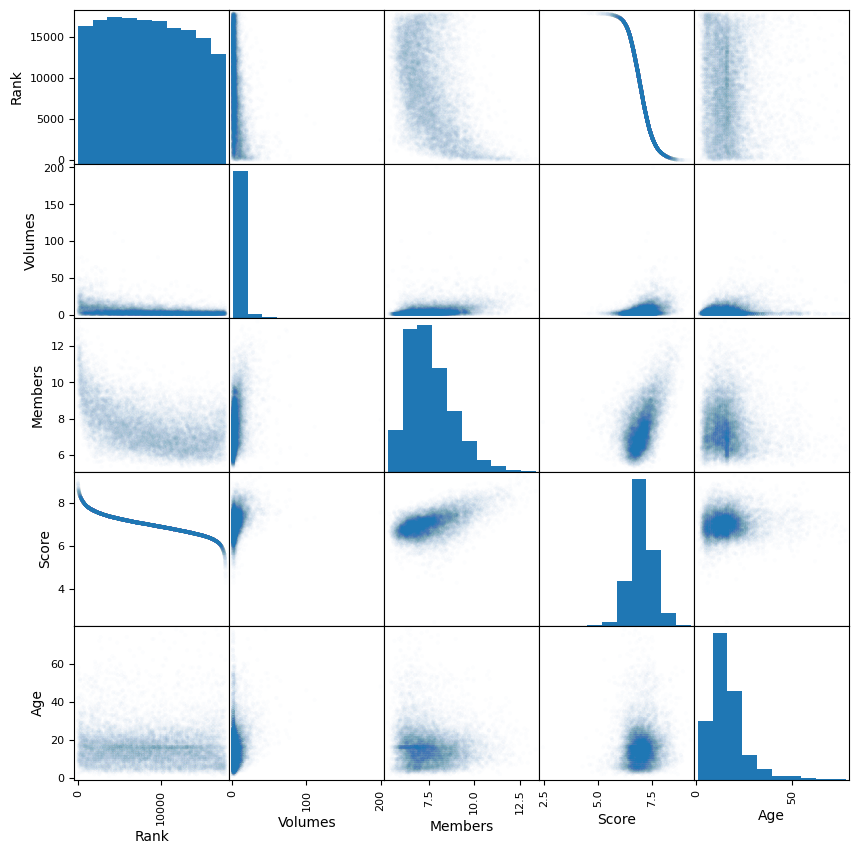

In [6]:
scatter_matrix(dataframe, alpha = .01, figsize = (10, 10))

In [7]:
type_column = dataframe["Type"]
tmp = type_column.str.get_dummies(sep=", ")

tmp = tmp.drop(columns=["UNKNOWN"], errors="ignore")
tmp = tmp.drop(columns=["Unknown"], errors="ignore")

tmp = tmp.add_prefix("Type_")

dataframe = pd.concat([dataframe.drop(columns=["Type"]), tmp], axis=1)

print(dataframe.columns)

Index(['Rank', 'Volumes', 'Members', 'Score', 'Age', 'Type_Doujinshi',
       'Type_Light-Novel', 'Type_Manga', 'Type_Manhua', 'Type_Manhwa',
       'Type_Novel'],
      dtype='object')


In [8]:
dataframe

,Rank,Volumes,Members,Score,Age,Type_Doujinshi,Type_Light-Novel,Type_Manga,Type_Manhua,Type_Manhwa,Type_Novel
0,460,35.0,9.594990,8.16,39.0,0,0,1,0,0,0
1,4532,18.0,9.448570,7.31,11.0,0,0,1,0,0,0
5,17169,2.0,8.205218,6.07,9.0,0,0,1,0,0,0
6,12124,3.0,7.063904,6.74,50.0,0,0,1,0,0,0
8,4417,1.0,8.700514,7.32,26.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
17802,9503,1.0,6.458338,6.93,13.0,0,0,1,0,0,0
17804,12277,3.0,6.610696,6.72,5.0,0,0,1,0,0,0
17807,5720,2.0,8.716700,7.21,16.0,0,0,1,0,0,0
17808,15889,3.0,6.546785,6.38,7.0,0,0,1,0,0,0


Векторизация

In [9]:
dataframe_num_data = dataframe[dataframe_num]
dataframe_num_data.describe()

,Rank,Members,Score,Volumes
count,12636.000000,12636.000000,12636.000000,12636.000000
mean,8608.038541,7.552971,7.020211,5.066793
std,5016.449074,1.219181,0.524978,6.863815
min,2.000000,5.267858,2.430000,1.000000
25%,4307.750000,6.639876,6.680000,1.000000
50%,8486.500000,7.337588,7.000000,3.000000
75%,12850.250000,8.265457,7.330000,6.000000
max,17847.000000,13.357736,9.300000,200.000000


In [10]:
dataframe_num_data = (dataframe_num_data - dataframe_num_data.mean(axis = 0))/dataframe_num_data.std(axis = 0)
dataframe_num_data.describe()

,Rank,Members,Score,Volumes
count,1.263600e+04,1.263600e+04,1.263600e+04,1.263600e+04
mean,3.205202e-17,1.074024e-16,1.366428e-16,-3.486360e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.715564e+00,-1.874301e+00,-8.743624e+00,-5.924975e-01
25%,-8.572376e-01,-7.489411e-01,-6.480486e-01,-5.924975e-01
50%,-2.422800e-02,-1.766619e-01,-3.849932e-02,-3.011143e-01
75%,8.456602e-01,5.843978e-01,5.900983e-01,1.359603e-01
max,1.841733e+00,4.761200e+00,4.342636e+00,2.840012e+01


In [11]:
dataframe_num_data

,Rank,Members,Score,Volumes
0,-1.624264,1.674911,2.171117,4.361016
1,-0.812535,1.554813,0.552002,1.884259
5,1.706578,0.534989,-1.810002,-0.446806
6,0.700887,-0.401144,-0.533758,-0.301114
8,-0.835459,0.941241,0.571050,-0.592497
...,...,...,...,...
17802,0.178405,-0.897842,-0.171838,-0.592497
17804,0.731386,-0.772875,-0.571855,-0.301114
17807,-0.575714,0.954517,0.361517,-0.446806
17808,1.451417,-0.825296,-1.219501,-0.301114


In [12]:
dataframe = pd.concat([dataframe.drop(columns=dataframe_num), dataframe_num_data], axis=1)
dataframe

,Age,Type_Doujinshi,Type_Light-Novel,Type_Manga,Type_Manhua,Type_Manhwa,Type_Novel,Rank,Members,Score,Volumes
0,39.0,0,0,1,0,0,0,-1.624264,1.674911,2.171117,4.361016
1,11.0,0,0,1,0,0,0,-0.812535,1.554813,0.552002,1.884259
5,9.0,0,0,1,0,0,0,1.706578,0.534989,-1.810002,-0.446806
6,50.0,0,0,1,0,0,0,0.700887,-0.401144,-0.533758,-0.301114
8,26.0,0,0,1,0,0,0,-0.835459,0.941241,0.571050,-0.592497
...,...,...,...,...,...,...,...,...,...,...,...
17802,13.0,0,0,1,0,0,0,0.178405,-0.897842,-0.171838,-0.592497
17804,5.0,0,0,1,0,0,0,0.731386,-0.772875,-0.571855,-0.301114
17807,16.0,0,0,1,0,0,0,-0.575714,0.954517,0.361517,-0.446806
17808,7.0,0,0,1,0,0,0,1.451417,-0.825296,-1.219501,-0.301114


Разделение данных на тестовую и обучающую выборки

In [13]:
X = dataframe.drop(columns=all_types)
y = dataframe[all_types].to_numpy()
feature_names = X.columns
X = X.to_numpy()
N, d = X.shape

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

8845 3791


Random Forest Classifier

In [15]:
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train_rf = np.mean(y_train != rf.predict(X_train))
err_test_rf  = np.mean(y_test  != rf.predict(X_test))

print("RFC: Ошибка на обучающей выборке: ", err_train_rf)
print("RFC: Ошибка на тестовой выборке: ", err_test_rf)

RFC: Ошибка на обучающей выборке:  0.0
RFC: Ошибка на тестовой выборке:  0.034291743603270905


In [16]:
np.sum(rf.feature_importances_)

0.9999999999999999

Анализ важности признаков в RFC

In [17]:
importances = rf.feature_importances_
sums = {}
indexes_to_delete = []

for f in range(d):
    tmp = feature_names[f].find('_')
    if not feature_names[f][:tmp] in dataframe_str:
        continue
    tmp = feature_names[f][:tmp]
    if (not tmp in sums.keys()):
        sums[tmp] = 0
    sums[tmp] += importances[f]
    indexes_to_delete.append(f)

importances = list(np.delete(importances, indexes_to_delete))
feature_names = list(np.delete(feature_names, indexes_to_delete))

importances.extend(sums.values())
feature_names.extend(sums.keys())

importances = np.array(importances, dtype=np.float64)
feature_names = np.array(feature_names)

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(len(feature_names)):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'Members' (0.280372)
 2. feature ' Rank' (0.262509)
 3. feature '  Age' (0.168358)
 4. feature 'Score' (0.166425)
 5. feature 'Volumes' (0.122337)


(-1.0, 5.0)

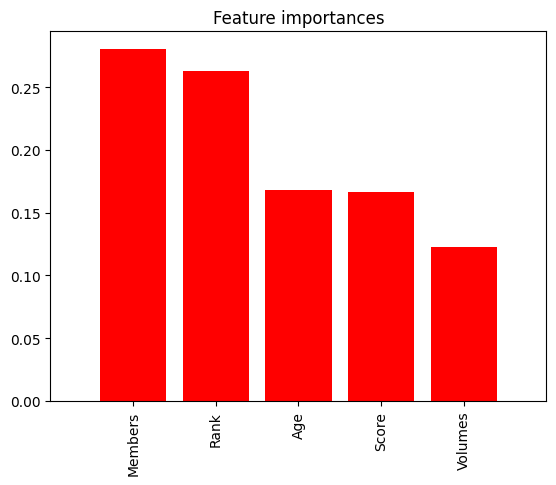

In [18]:
d_first = min(len(feature_names), 20)
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

KNN

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

err_train_knn = np.mean(y_train != y_train_pred_knn)
err_test_knn = np.mean(y_test != y_test_pred_knn)

print("KNN: Ошибка на обучающей выборке: ", err_train_knn)
print("KNN: Ошибка на тестовой выборке: ", err_test_knn)

KNN: Ошибка на обучающей выборке:  0.03154324477105709
KNN: Ошибка на тестовой выборке:  0.035610656818781325


Сравнение

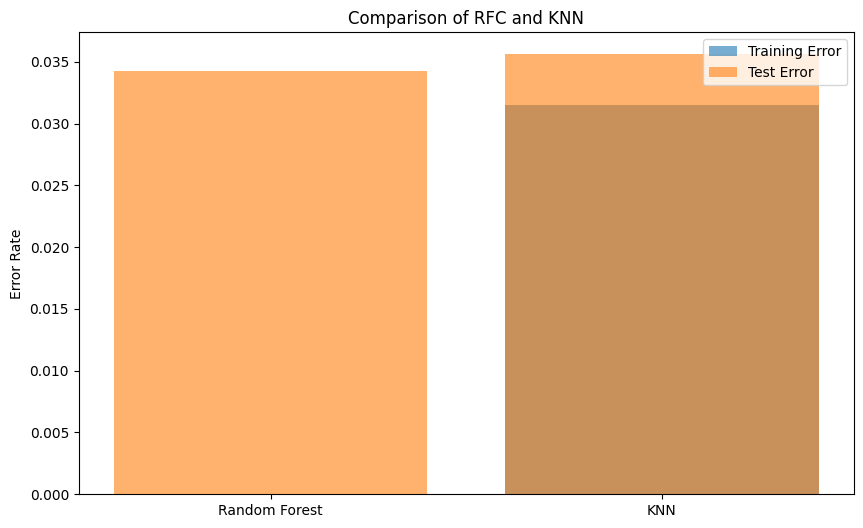

In [20]:
models = ['Random Forest', 'KNN']
train_errors = [err_train_rf, err_train_knn]
test_errors = [err_test_rf, err_test_knn]

plt.figure(figsize=(10, 6))
plt.bar(models, train_errors, alpha=0.6, label='Training Error')
plt.bar(models, test_errors, alpha=0.6, label='Test Error')
plt.ylabel('Error Rate')
plt.title('Comparison of RFC and KNN')
plt.legend()
plt.show()


Вывод

Для реальной системы рекомендаций манги предпочтительнее использовать KNN, так как модель продемонстрировала хорошую способность к обобщению на тестовой выборке и не страдала от переобучения. KNN проста в реализации и достаточно эффективна для задач с ограниченными размерами данных.

Random Forest может быть использована для более сложных случаев, где необходимо учитывать много факторов и зависимостей. Однако для её успешного применения нужно снизить степень переобучения, чтобы модель не была слишком специализированной на обучающем наборе данных.

В целом, для построения системы рекомендаций манги на основе классификации, KNN является хорошим выбором для данной задачи, а RFC может быть использована в случае необходимости повышения точности с дальнейшей оптимизацией модели.

Заключение: Использование алгоритмов машинного обучения позволяет создать эффективную систему рекомендаций манги, которая будет учитывать различные особенности (жанры, поджанры, возростной рейтинг, автор и многое другое) и предпочтения читателей, помогая им находить новые произведения на основе сходства с теми, что им уже понравились.

Задача кластеризации

Задача кластеризации — это одна из задач обучения без учителя (unsupervised learning) в машинном обучении. Основная цель кластеризации — разбить набор данных на группы (кластеры), так чтобы объекты внутри одного кластера были более похожи друг на друга, чем на объекты из других кластеров. Это позволяет выявить скрытые структуры в данных, которые могут быть полезны для дальнейшего анализа.

        Метод                 Метрика  Значение
0      KMeans               V-measure  0.012955
1      KMeans     Adjusted Rand Index -0.009028
2      KMeans             Mutual Info  0.013283
3      KMeans  Normalized Mutual Info  0.012955
4      KMeans    Adjusted Mutual Info  0.011972
5      DBSCAN               V-measure  0.013382
6      DBSCAN     Adjusted Rand Index -0.000910
7      DBSCAN             Mutual Info  0.023900
8      DBSCAN  Normalized Mutual Info  0.013382
9      DBSCAN    Adjusted Mutual Info  0.007412
10  MeanShift               V-measure  0.011625
11  MeanShift     Adjusted Rand Index -0.056946
12  MeanShift             Mutual Info  0.004094
13  MeanShift  Normalized Mutual Info  0.011625
14  MeanShift    Adjusted Mutual Info  0.010139

Сводная таблица результатов кластеризации:
Метрика    Adjusted Mutual Info  Adjusted Rand Index  Mutual Info  \
Метод                                                               
DBSCAN                 0.007412            -0.0009

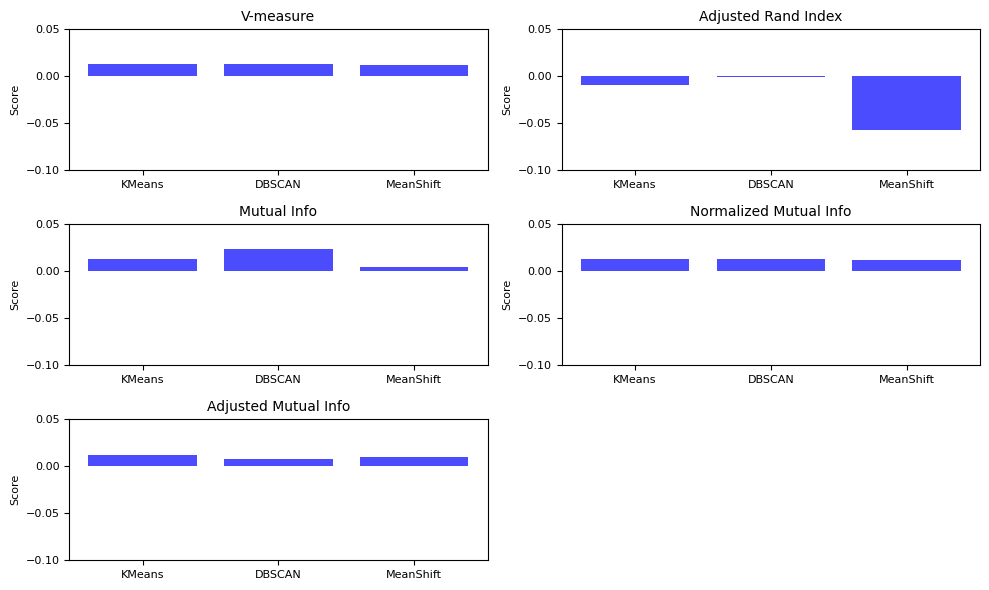

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.metrics import (
    v_measure_score, 
    adjusted_rand_score, 
    mutual_info_score, 
    normalized_mutual_info_score, 
    adjusted_mutual_info_score
)

X_clustering = dataframe.drop(columns=all_types).to_numpy()
y_clustering = y
N_clustering, d_clustering = X_clustering.shape

bandwidth = estimate_bandwidth(X_clustering, quantile=0.3, random_state=42)

kmeans = KMeans(n_clusters=y_clustering.shape[1], random_state=42)
dbscan = DBSCAN(eps=0.5)
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)

algs = (
    ("KMeans", kmeans),
    ("DBSCAN", dbscan),
    ("MeanShift", meanshift),
)

y_clustering_num = np.argmax(y_clustering, axis=1)

metrics_res = []

for alg_name, alg in algs:
    alg_labels = alg.fit_predict(X_clustering)
    
    all_metrics = (
        ("V-measure", v_measure_score),
        ("Adjusted Rand Index", adjusted_rand_score),
        ("Mutual Info", mutual_info_score),
        ("Normalized Mutual Info", normalized_mutual_info_score),
        ("Adjusted Mutual Info", adjusted_mutual_info_score),
    )
    
    for metric_name, metric in all_metrics:
        score = metric(y_clustering_num, alg_labels)
        metrics_res.append((alg_name, metric_name, score))

metrics_res_df = pd.DataFrame(metrics_res, columns=("Метод", "Метрика", "Значение"))
print(metrics_res_df)

metrics_res_df_pivot = metrics_res_df.pivot(index="Метод", columns="Метрика", values="Значение")
print("\nСводная таблица результатов кластеризации:")
print(metrics_res_df_pivot)

plt.figure(figsize=(10, 6))
for i, metric_name in enumerate(metrics_res_df["Метрика"].unique()):
    plt.subplot(3, 2, i + 1)
    metric_scores = metrics_res_df[metrics_res_df["Метрика"] == metric_name]
    plt.bar(metric_scores["Метод"], metric_scores["Значение"], alpha=0.7, color='b')
    plt.title(metric_name, fontsize=10)
    plt.ylabel("Score", fontsize=8)
    plt.ylim(-0.1, 0.05)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


Исходя из полученных результатов можно заключить, что методы кластеризации (обучение без учителя) не подходят для данной задачи, так как они не смогли выявить структуры в данных, соответствующие истинным меткам классов. Все примененные алгоритмы кластеризации показали низкие результаты по ключевым метрикам, таким как Adjusted Rand Index и V-Measure. Поэтому для получения более точных результатов рекомендуется использовать методы обучения с учителем, такие как Random Forest или KNN, которые продемонстрировали более высокую эффективность в данной задаче.